In [1]:
import pandas as pd

pd.set_option("display.max_columns", None)  # 모든 열 표시
pd.set_option("display.max_rows", None)  # 모든 열 표시
pd.set_option("display.expand_frame_repr", False)  # 가로로 긴 데이터프레임 줄바꿈 방지

In [7]:
import pyreadstat
from lifelines import KaplanMeierFitter
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from psmpy import PsmPy
import numpy as np

# path = "./2025-04-18_20-40_mod_wStea_2nd Preprocessing.csv"  ##SMI 도움 없이 Fibrosis 채움
# path = "./2025-04-19_17-48_mod_wStea_2nd Preprocessing.csv" ##SMI 도움으로 FIbrsis 채움
# path = "./temp.csv"  # SMI 도움 받고, 피검사는 fS date에 가까운 애들로
path = "./2025-04-18_20-40_mod_wStea_2nd Preprocessing.csv"

df = pd.read_csv(path, na_values=["", "NaN"], keep_default_na=False)

In [8]:
# Fibrosis 처리

df["Significant Fibrosis"] = (df["Fibrosis"] >= 2).astype(int)  # F2, F3, F4
df["Advanced Fibrosis"] = (df["Fibrosis"] >= 3).astype(int)  # F3, F4

In [4]:
# Steatosis 처리

# df["Mild Steatosis"] = (df["Steatosis Score"] >= 1).astype(int)  # S1, S2, S3
# df["Severe Fibrosis"] = (df["Steatosis Score"] >= 2).astype(int) # S2, S3


df["Mild-to-Severe Steatosis"] = (df["Steatosis Score"] >= 1).astype(int)  # S1, S2, S3
df["Moderate-to-Severe Steatosis"] = (df["Steatosis Score"] >= 2).astype(int)  # S2, S3

In [9]:
missing_df = df.isna().sum().reset_index()
missing_df.columns = ["Column", "Missing_Count"]
missing_df = missing_df[missing_df["Missing_Count"] > 0].sort_values(
    by="Missing_Count", ascending=False
)
missing_df

,Column,Missing_Count
74,HRS_Date,192
5,Death Date,190
70,VB_Date,189
76,LT_Date,184
68,Ascites_Date,177
66,LRE Date,165
72,HEP_Date,155
10,Fibrosis Stage,58


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 81 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            192 non-null    int64  
 1   Sex                           192 non-null    int64  
 2   Birth Date                    192 non-null    object 
 3   Age                           192 non-null    int64  
 4   Death                         192 non-null    int64  
 5   Death Date                    2 non-null      object 
 6   Last F/U                      192 non-null    object 
 7   Smoking                       192 non-null    float64
 8   Steatosis Score               192 non-null    float64
 9   Fibrosis                      192 non-null    float64
 10  Fibrosis Stage                134 non-null    object 
 11  FIB-4                         192 non-null    float64
 12  NAFLD Type                    192 non-null    object 
 13  NAFLD

# 본격적으로 시작


In [10]:
import pandas as pd

pd.set_option("display.max_columns", None)  # 모든 열 표시
pd.set_option("display.max_rows", None)  # 모든 열 표시
pd.set_option("display.expand_frame_repr", False)  # 가로로 긴 데이터프레임 줄바꿈 방지

In [11]:
import pyreadstat
import pandas as pd

from lifelines import KaplanMeierFitter
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from psmpy import PsmPy
import numpy as np

path = "./2025-04-18_20-40_mod_wStea_2nd Preprocessing.csv"
# path = "./2025-04-18_20-40_mod_wStea_2nd Preprocessing.csv"  ##SMI 도움 없이 Fibrosis 채움
# path = "./2025-04-19_17-48_mod_wStea_2nd Preprocessing.csv" ##SMI 도움으로 FIbrsis 채움
# path = "./temp.csv"  # SMI 도움 받고, 피검사는 fS date에 가까운애들로로
# path = "./2025-04-20_20-58_mod_wStea_2nd Preprocessing.csv"
# path = "./2025-04-20_22-03_mod_wStea_2nd Preprocessing.csv"
# parth = "./2025-04-18_20-40_mod_wStea_2nd Preprocessing.csv"
df = pd.read_csv(path, na_values=["", "NaN"], keep_default_na=False)

In [12]:
df["당뇨병/당뇨병 전단계 유무2"] = df["당뇨병/당뇨병 전단계 유무"].replace({1: 1, 2: 1})

In [13]:
# Fibrosis 처리

df["Significant Fibrosis"] = (df["Fibrosis"] >= 2).astype(int)  # F2, F3, F4
df["Advanced Fibrosis"] = (df["Fibrosis"] >= 3).astype(int)  # F3, F4

In [14]:
# Steatosis 처리

# df["Mild Steatosis"] = (df["Steatosis Score"] >= 1).astype(int)  # S1, S2, S3
# df["Severe Fibrosis"] = (df["Steatosis Score"] >= 2).astype(int) # S2, S3


df["Mild-to-Severe Steatosis"] = (df["Steatosis Score"] >= 1).astype(int)  # S1, S2, S3
df["Moderate-to-Severe Steatosis"] = (df["Steatosis Score"] >= 2).astype(int)  # S2, S3

In [15]:
df.columns.tolist()

['ID',
 'Sex',
 'Birth Date',
 'Age',
 'Death',
 'Death Date',
 'Last F/U',
 'Smoking',
 'Steatosis Score',
 'Fibrosis',
 'Fibrosis Stage',
 'FIB-4',
 'NAFLD Type',
 'NAFLD Type_C',
 'NASH',
 'Weight',
 'Height',
 'BMI',
 'Waist',
 'Waist to Height',
 'SBP',
 'DBP',
 'AST',
 'ALT',
 'T.bil',
 'PLT',
 'PT INR',
 'Alb',
 'Glucose',
 'HbA1c',
 'eGFR',
 'T.chol',
 'HDL',
 'LDL',
 'TG',
 '당뇨병/당뇨병 전단계 유무',
 '고혈압유무',
 '이상지질혈증 유무',
 'Ischemic Heart Diseae 유무',
 'Cerebrovascualr disease 유무',
 'Nephropathy 유무',
 'LSM',
 'CAP',
 'Liver (PDFF)',
 'Liver (HU)',
 'Spleen (HU)',
 'Liver/Spleen HU',
 'Liver (Volume)',
 'Spleen (Volume)',
 'Liver/Spleen Volume',
 'VFA (Volume)',
 'SFA (Volume)',
 'SMA (Volume)',
 'VFA (Area)',
 'SFA (Area)',
 'SMA (Area)',
 'VFA (Attenuation)',
 'SFA (Attenuation)',
 'SMA (Attenuation)',
 'VFI',
 'SFI',
 'TFI',
 'SMI',
 'FS_date',
 'CT_B date',
 'LRE',
 'LRE Date',
 'Ascites',
 'Ascites_Date',
 'VB',
 'VB_Date',
 'HEP',
 'HEP_Date',
 'HRS',
 'HRS_Date',
 'LT',
 'LT_Dat

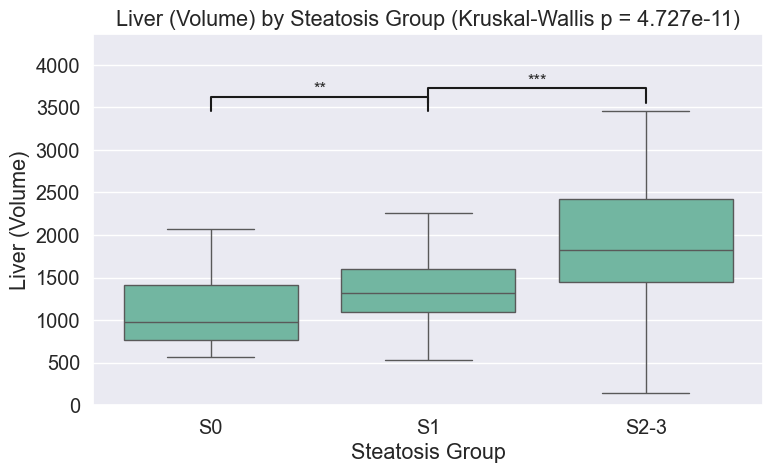

In [ ]:
# Steatosis 그룹 별 boxplot 그리기

import seaborn as sns
import matplotlib.pyplot as plt



from scipy.stats import kruskal, mannwhitneyu
import itertools



# 복사 및 전처리


temp_df = df.copy()


temp_df = temp_df[temp_df["Steatosis Score"].notna()].copy()


temp_df["Steatosis Score"] = temp_df["Steatosis Score"].astype(int)



# 그룹핑: S0, S1, S2-3


temp_df["Steatosis_group"] = temp_df["Steatosis Score"].map(
    lambda x: "S0" if x == 0 else "S1" if x == 1 else "S2-3"
)



subject = "Steatosis"



# variable = "TFI"


# variable = "Liver/Spleen HU"  # ← Change this to the variable you want to analyze


variable = "Liver (Volume)"  # ← Change this to the variable you want to analyze



group_var = "Steatosis_group"


group_order = ["S0", "S1", "S2-3"]



sns.set_palette("Set2")



# Kruskal-Wallis


grouped = temp_df.groupby(group_var)[variable]


stat, p_kw = kruskal(*[group for name, group in grouped])



q3 = temp_df[variable].quantile(0.75)



iqr = q3 - temp_df[variable].quantile(0.25)


y_max = q3 + 1.5 * iqr


# y_max = q3 + iqr


y_max *= 1.2



# Boxplot


plt.figure(figsize=(8, 5))
ax = sns.boxplot(
    data=temp_df,

    x=group_var,
    y=variable,
    order=group_order,

    showfliers=False,
)



plt.ylim(0, y_max * 1.3)


plt.title(f"{variable} by {subject} Group (Kruskal-Wallis p = {p_kw:.3e})")


plt.xlabel(f"{subject} Group")


plt.ylabel(variable)



# Pairwise Mann-Whitney (인접 비교)


comparisons = [
    (group_order[i], group_order[i + 1]) for i in range(len(group_order) - 1)
]



for i, (g1, g2) in enumerate(comparisons):


    data1 = temp_df[temp_df[group_var] == g1][variable]

    data2 = temp_df[temp_df[group_var] == g2][variable]

    stat, p = mannwhitneyu(data1, data2)


    star = "***" if p < 0.001 else "**" if p < 0.01 else "*" if p < 0.05 else "ns"


    x1, x2 = group_order.index(g1), group_order.index(g2)


    y = y_max + (i + 1) * (y_max * 0.03)

    gap = y_max * 0.05

    ax.plot([x1, x1, x2, x2], [y, y + gap, y + gap, y], lw=1.5, c="k")

    ax.text((x1 + x2) / 2, y + gap, star, ha="center", va="bottom", fontsize=12)



plt.tight_layout()


plt.show()

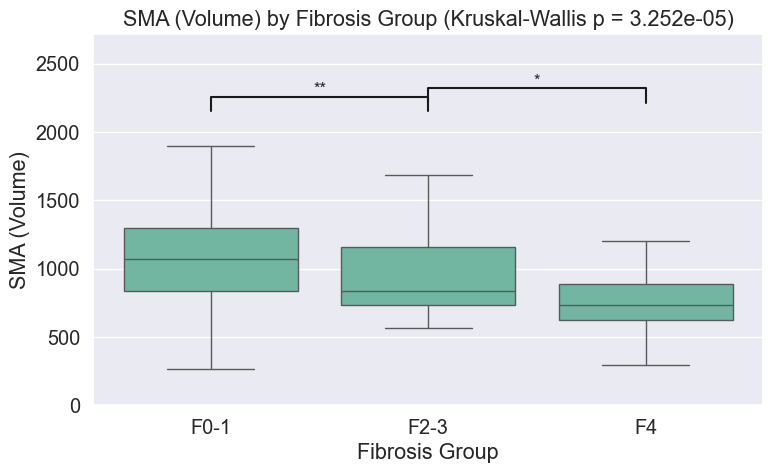

In [ ]:
# Fiborosis 그룹 별 boxplot 그리기

import seaborn as sns
import matplotlib.pyplot as plt



from scipy.stats import kruskal, mannwhitneyu
import itertools



# 복사 및 전처리


temp_df = df.copy()


temp_df = temp_df[temp_df["Fibrosis"].notna()].copy()


temp_df["Fibrosis"] = temp_df["Fibrosis"].astype(int)



subject = "Fibrosis"



# 그룹핑: F0-1, F2-3, F4


group_var = f"{subject}_group"



temp_df[group_var] = temp_df["Fibrosis"].map(
    lambda x: "F0-1" if x in [0, 1] else "F2-3" if x in [2, 3] else "F4"
)



group_order = ["F0-1", "F2-3", "F4"]



# # 그룹핑: F0-2, F3-4


# group_var = f"{subject}_group"



# temp_df[group_var] = temp_df["Fibrosis"].map(


#     lambda x: "F0-2" if x in [0, 1, 2] else "F3-4"


# )



# group_order = ["F0-2", "F3-4"]



variable = "SMA (Volume)"  # ← Change this to the variable you want to analyze



sns.set_palette("Set2")



# Kruskal-Wallis


grouped = temp_df.groupby(group_var)[variable]


stat, p_kw = kruskal(*[group for name, group in grouped])



q3 = temp_df[variable].quantile(0.75)



iqr = q3 - temp_df[variable].quantile(0.25)


y_max = q3 + 1.5 * iqr


# y_max = q3 + iqr


y_max *= 1.1



# Boxplot


plt.figure(figsize=(8, 5))
ax = sns.boxplot(
    data=temp_df,

    x=group_var,
    y=variable,
    order=group_order,

    showfliers=False,
)



plt.ylim(0, y_max * 1.3)


plt.title(f"{variable} by {subject} Group (Kruskal-Wallis p = {p_kw:.3e})")


plt.xlabel(f"{subject} Group")


plt.ylabel(variable)



# Pairwise Mann-Whitney (인접 비교)


comparisons = [
    (group_order[i], group_order[i + 1]) for i in range(len(group_order) - 1)
]



for i, (g1, g2) in enumerate(comparisons):

    data1 = temp_df[temp_df[group_var] == g1][variable]

    data2 = temp_df[temp_df[group_var] == g2][variable]


    stat, p = mannwhitneyu(data1, data2)


    star = "***" if p < 0.001 else "**" if p < 0.01 else "*" if p < 0.05 else "ns"


    x1, x2 = group_order.index(g1), group_order.index(g2)


    y = y_max + (i + 1) * (y_max * 0.03)

    gap = y_max * 0.05

    ax.plot([x1, x1, x2, x2], [y, y + gap, y + gap, y], lw=1.5, c="k")

    ax.text((x1 + x2) / 2, y + gap, star, ha="center", va="bottom", fontsize=12)



plt.tight_layout()


plt.show()

### Covariates 만들기

In [17]:
# Multivariate analysis for all groups
import pandas as pd
import numpy as np
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming combined_data is already preprocessed and available

# Define continuous and categorical variables
continuous_vars = [
    "Age",
    "Weight",
    "Height",
    "Waist to Height",
    "Waist",
    "BMI",
    ##############################
    "FIB-4",
    "SBP",
    "DBP",
    "AST",
    "ALT",
    "T.bil",
    "PLT",
    "PT INR",
    "Alb",
    "Glucose",
    "HbA1c",
    "eGFR",
    "T.chol",
    "HDL",
    "LDL",
    "TG",
    ############################
    "LSM",
    "CAP",
    ############################
    "Liver (PDFF)",
    "Liver (HU)",
    "Spleen (HU)",
    "Liver/Spleen HU",
    "Liver (Volume)",
    "Spleen (Volume)",
    "Liver/Spleen Volume",
    "VFA (Volume)",
    "SFA (Volume)",
    "SMA (Volume)",
    "VFA (Area)",
    "SFA (Area)",
    "SMA (Area)",
    "VFA (Attenuation)",
    "SFA (Attenuation)",
    "SMA (Attenuation)",
    "VFI",
    "SFI",
    "TFI",
    "SMI",
]


# Convert continuous variables to binary (above/below median)
for var in continuous_vars:
    median_value = df[var].median()
    df[f"{var}_above_median"] = (df[var] > median_value).astype(int)

# List of categorical variables
categorical_vars = [
    "Sex",
    "Smoking",
    "당뇨병/당뇨병 전단계 유무",
    "당뇨병/당뇨병 전단계 유무2",
    "고혈압유무",
    "이상지질혈증 유무",
    "Ischemic Heart Diseae 유무",
    "Cerebrovascualr disease 유무",
    "Nephropathy 유무",
]


# Define the list of covariates for the Cox model
covariates = [f"{var}_above_median" for var in continuous_vars] + [
    cat for cat in categorical_vars
]

In [171]:
covariates

['Age_above_median',
 'Weight_above_median',
 'Height_above_median',
 'Waist to Height_above_median',
 'Waist_above_median',
 'BMI_above_median',
 'FIB-4_above_median',
 'SBP_above_median',
 'DBP_above_median',
 'AST_above_median',
 'ALT_above_median',
 'T.bil_above_median',
 'PLT_above_median',
 'PT INR_above_median',
 'Alb_above_median',
 'Glucose_above_median',
 'HbA1c_above_median',
 'eGFR_above_median',
 'T.chol_above_median',
 'HDL_above_median',
 'LDL_above_median',
 'TG_above_median',
 'LSM_above_median',
 'CAP_above_median',
 'Liver (PDFF)_above_median',
 'Liver (HU)_above_median',
 'Spleen (HU)_above_median',
 'Liver/Spleen HU_above_median',
 'Liver (Volume)_above_median',
 'Spleen (Volume)_above_median',
 'Liver/Spleen Volume_above_median',
 'VFA (Volume)_above_median',
 'SFA (Volume)_above_median',
 'SMA (Volume)_above_median',
 'VFA (Area)_above_median',
 'SFA (Area)_above_median',
 'SMA (Area)_above_median',
 'VFA (Attenuation)_above_median',
 'SFA (Attenuation)_above_med

## Advanced Fibrosis에 대한 분석


In [ ]:
# univariate logistic regression for all variables

import pandas as pd
import statsmodels.api as sm



# Create binary label for fibrosis (e.g., advanced fibrosis defined as stage ≥ 3)


# df = matched_df.copy()


temp_df = df.copy()



dependent_variable = "Advanced Fibrosis"



# Function to perform univariable logistic regression and return OR, CI, and p-value


def logistic_odds_ratio_analysis(df, covariates, outcome_col):

    results = []


    for var in covariates:

        try:

            sub_df = df[[outcome_col, var]].dropna()


            if sub_df[var].nunique() <= 1:

                print(f"⚠️ Skipping '{var}' — only one unique value.")
                continue


            sub_df = sm.add_constant(sub_df)

            model = sm.Logit(sub_df[outcome_col], sub_df[["const", var]]).fit(disp=0)


            odds_ratio = np.exp(model.params[var])

            conf = model.conf_int().loc[var]

            ci_lower, ci_upper = np.exp(conf[0]), np.exp(conf[1])


            pval = model.pvalues[var]

            results.append(

                {
                    "Variable": var,

                    "OR": odds_ratio,

                    "95% CI Lower": ci_lower,
                    "95% CI Upper": ci_upper,
                    "p-value": pval,
                }
            )


        except Exception as e:

            print(f"❌ Error with '{var}': {e}")
            continue


    return pd.DataFrame(results).sort_values(by="p-value")



# Run the analysis


odds_ratio_results = logistic_odds_ratio_analysis(
    temp_df, covariates, outcome_col=dependent_variable
)
odds_ratio_results

,Variable,OR,95% CI Lower,95% CI Upper,p-value
22,LSM_above_median,44.591837,10.386158,191.450186,3.252152e-07
6,FIB-4_above_median,6.614035,2.977692,14.691062,3.487864e-06
33,SMA (Volume)_above_median,0.151194,0.068069,0.335831,3.487864e-06
12,PLT_above_median,0.272978,0.133233,0.559299,3.885965e-04
43,SMI_above_median,0.272978,0.133233,0.559299,3.885965e-04
0,Age_above_median,3.663304,1.787954,7.505673,3.885965e-04
49,이상지질혈증 유무,3.370370,1.661457,6.837007,7.605727e-04
9,AST_above_median,3.304450,1.633213,6.685832,8.864856e-04
20,LDL_above_median,0.193798,0.072327,0.519278,1.102021e-03
2,Height_above_median,0.314286,0.153587,0.643124,1.533686e-03


In [20]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform

# 시스템에 따라 폰트 설정
if platform.system() == "Windows":
    plt.rcParams["font.family"] = "Malgun Gothic"
elif platform.system() == "Darwin":  # macOS
    plt.rcParams["font.family"] = "AppleGothic"
else:
    plt.rcParams["font.family"] = "NanumGothic"

# 마이너 경고 제거 (음수 부호 깨짐 방지)
plt.rcParams["axes.unicode_minus"] = False

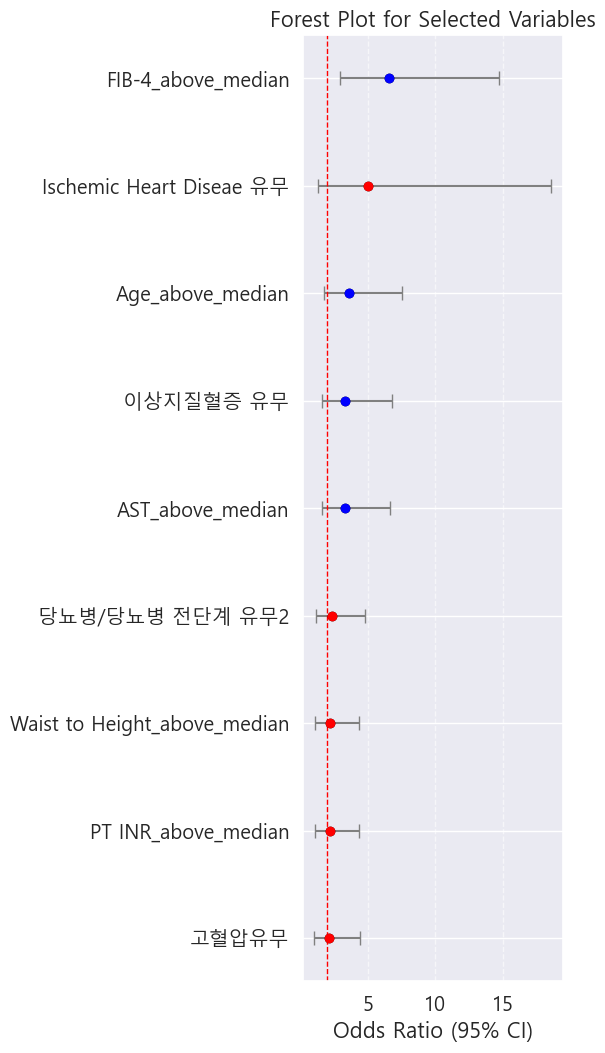

In [ ]:
# OR 시각화
import matplotlib.pyplot as plt



# p < 0.05 + 높은 OR 순으로 상위 5개 자동 선택


sig_var_list = (

    odds_ratio_results[odds_ratio_results["p-value"] < 0.05]
    .sort_values("OR", ascending=False)
    .head(10)["Variable"]
    .tolist()
)



# "LSM_above_median" 제거


sig_var_list = [v for v in sig_var_list if v != "LSM_above_median"]



# 필터링된 결과


sig_df = odds_ratio_results[odds_ratio_results["Variable"].isin(sig_var_list)].copy()



sig_df.sort_values("OR", inplace=True)


y_pos = range(len(sig_df))



# 색 결정: p < 0.001 → blue, else red


colors = ["blue" if p < 0.001 else "red" for p in sig_df["p-value"]]



# Plot


plt.figure(figsize=(6, len(sig_df) * 1.2))


plt.errorbar(

    sig_df["OR"],
    y_pos,

    xerr=[sig_df["OR"] - sig_df["95% CI Lower"], sig_df["95% CI Upper"] - sig_df["OR"]],
    fmt="o",
    color="black",  # edge color
    ecolor="gray",
    capsize=5,
)



# scatter만 색 다르게


for i, (x, c) in enumerate(zip(sig_df["OR"], colors)):

    plt.scatter(x, i, color=c, zorder=3)



plt.axvline(x=2, color="red", linestyle="--", linewidth=1)


plt.yticks(y_pos, sig_df["Variable"])



plt.xlabel("Odds Ratio (95% CI)")


plt.title("Forest Plot for Selected Variables")



plt.grid(True, axis="x", linestyle="--", alpha=0.6)


plt.tight_layout()


plt.show()

## Backward Stepwise

In [45]:
import pandas as pd
import statsmodels.api as sm

# Create binary label for fibrosis (e.g., advanced fibrosis defined as stage ≥ 3)
# df = matched_df.copy()
temp_df = df.copy()

dependent_variable = "Advanced Fibrosis"

from sklearn.metrics import roc_auc_score


def logistic_odds_ratio_analysis(df, covariates, outcome_col):
    results = []

    for var in covariates:
        try:
            sub_df = df[[outcome_col, var]].dropna()

            if sub_df[var].nunique() <= 1:
                print(f"⚠️ Skipping '{var}' — only one unique value.")
                continue

            sub_df = sm.add_constant(sub_df)
            model = sm.Logit(sub_df[outcome_col], sub_df[["const", var]]).fit(disp=0)

            odds_ratio = np.exp(model.params[var])
            conf = model.conf_int().loc[var]
            ci_lower, ci_upper = np.exp(conf[0]), np.exp(conf[1])
            pval = model.pvalues[var]

            # AUC 계산
            y_pred = model.predict(sub_df[["const", var]])
            auc = roc_auc_score(sub_df[outcome_col], y_pred)

            results.append(
                {
                    "Variable": var,
                    "OR": odds_ratio,
                    "95% CI Lower": ci_lower,
                    "95% CI Upper": ci_upper,
                    "p-value": pval,
                    "AUC": auc,
                }
            )
        except Exception as e:
            print(f"❌ Error with '{var}': {e}")
            continue

    return pd.DataFrame(results).sort_values(by="p-value")


# Run the analysis
odds_ratio_results = logistic_odds_ratio_analysis(
    temp_df, covariates, outcome_col=dependent_variable
)
odds_ratio_results

,Variable,OR,95% CI Lower,95% CI Upper,p-value,AUC
22,LSM_above_median,44.591837,10.386158,191.450186,3.252152e-07,0.809028
6,FIB-4_above_median,6.614035,2.977692,14.691062,3.487864e-06,0.708333
33,SMA (Volume)_above_median,0.151194,0.068069,0.335831,3.487864e-06,0.708333
12,PLT_above_median,0.272978,0.133233,0.559299,3.885965e-04,0.652778
43,SMI_above_median,0.272978,0.133233,0.559299,3.885965e-04,0.652778
0,Age_above_median,3.663304,1.787954,7.505673,3.885965e-04,0.652778
49,이상지질혈증 유무,3.370370,1.661457,6.837007,7.605727e-04,0.625000
9,AST_above_median,3.304450,1.633213,6.685832,8.864856e-04,0.642361
20,LDL_above_median,0.193798,0.072327,0.519278,1.102021e-03,0.635417
2,Height_above_median,0.314286,0.153587,0.643124,1.533686e-03,0.635417


In [46]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score, roc_curve

# Use a copy of the original DataFrame
df_model = df.copy()

# Filter the covariates from previous univariable results
prof_vars = [
    "Age",
    "Waist to Height",
    "BMI",
    "Sex",
    "AST",
    "ALT",
    "당뇨병/당뇨병 전단계 유무",
    "당뇨병/당뇨병 전단계 유무2",
    "PLT",
    "PT INR",
    "Alb",
    "VFI",
    "SFI",
    "TFI",
    "SMI",
    "VFA (Volume)",
    "SFA (Volume)",
    "SMA (Volume)",
    # "Spleen (Volume)",
    # "Liver (Volume)",
    # "VFA (Area)",
    # "SFA (Area)",
    # "SMA (Area)",
    # "VFA (Attenuation)",
    # "SFA (Attenuation)",
    # "SMA (Attenuation)",
    "Liver/Spleen Volume",
    "Liver/Spleen HU",
    # "Liver (HU)",
    # "Spleen (HU)",
    # "Liver (PDFF)",
]

prof_vars_above_median = [var + "_above_median" for var in prof_vars]

# Step 2: Replace specific ones (like 'DM_above_median' and 'Sex_above_median') with original names
replace_back = [
    "당뇨병/당뇨병 전단계 유무",
    "당뇨병/당뇨병 전단계 유무2",
    "Sex",
]
prof_vars_above_median = [
    (
        var
        if var.replace("_above_median", "") not in replace_back
        else var.replace("_above_median", "")
    )
    for var in prof_vars_above_median
]


significant_vars = list(
    set(odds_ratio_results[odds_ratio_results["p-value"] < 0.05]["Variable"])
)

significant_vars = list(
    set(odds_ratio_results[odds_ratio_results["p-value"] < 0.05]["Variable"])
    & set(prof_vars_above_median)
)


# Exclude LSM from modeling
significant_vars = [
    var
    for var in significant_vars
    if var != "LSM_above_median" and var != "FIB-4_above_median"
]


# Drop rows with missing values for selected covariates and outcome
model_df = df_model[[dependent_variable] + significant_vars].dropna()

# Define X and y
X = model_df[significant_vars]
y = model_df[dependent_variable]

# Add constant for intercept
X = sm.add_constant(X)


# Perform backward stepwise logistic regression
def backward_stepwise(X, y, threshold_out=0.05):
    remaining_vars = X.columns.tolist()
    while len(remaining_vars) > 1:
        model = sm.Logit(y, X[remaining_vars]).fit(disp=0)
        pvals = model.pvalues.iloc[1:]  # exclude intercept
        max_pval = pvals.max()
        if max_pval > threshold_out:
            excluded_var = pvals.idxmax()
            remaining_vars.remove(excluded_var)
        else:
            break
    final_model = sm.Logit(y, X[remaining_vars]).fit(disp=0)
    return final_model, remaining_vars


# Run backward stepwise
final_model, final_vars = backward_stepwise(X, y)

# Predict probabilities and calculate AUC
y_pred = final_model.predict(X[final_vars])
auc = roc_auc_score(y, y_pred)

# Extract the summary table
summary_df = final_model.summary2().tables[1]

# Calculate Odds Ratios and 95% CI
summary_df["OR"] = summary_df["Coef."].apply(lambda x: round(np.exp(x), 3))
summary_df["CI Lower"] = (summary_df["Coef."] - 1.96 * summary_df["Std.Err."]).apply(
    lambda x: round(np.exp(x), 3)
)
summary_df["CI Upper"] = (summary_df["Coef."] + 1.96 * summary_df["Std.Err."]).apply(
    lambda x: round(np.exp(x), 3)
)
summary_df["AUC"] = round(auc, 5)

# Optional: Rearrange columns
summary_df = summary_df[
    ["Coef.", "Std.Err.", "P>|z|", "OR", "CI Lower", "CI Upper", "AUC"]
]
print(f"📊 Multivariable Logistic Regression for {dependent_variable}")

summary_df

📊 Multivariable Logistic Regression for Advanced Fibrosis


,Coef.,Std.Err.,P>|z|,OR,CI Lower,CI Upper,AUC
const,-1.561003,0.418382,0.000191,0.210,0.092,0.477,0.84049
SMA (Volume)_above_median,-2.073661,0.464714,0.000008,0.126,0.051,0.313,0.84049
Waist to Height_above_median,0.865743,0.422376,0.040394,2.377,1.039,5.439,0.84049
당뇨병/당뇨병 전단계 유무2,0.940437,0.433008,0.029866,2.561,1.096,5.984,0.84049
ALT_above_median,-1.243339,0.476621,0.009090,0.288,0.113,0.734,0.84049
AST_above_median,1.862972,0.492773,0.000156,6.443,2.453,16.925,0.84049


✅ Multivariable Model AUC: 0.840 (95% CI: 0.767 – 0.900)
✅ LSM only AUC: 0.913
✅ FIB-4 only AUC: 0.758


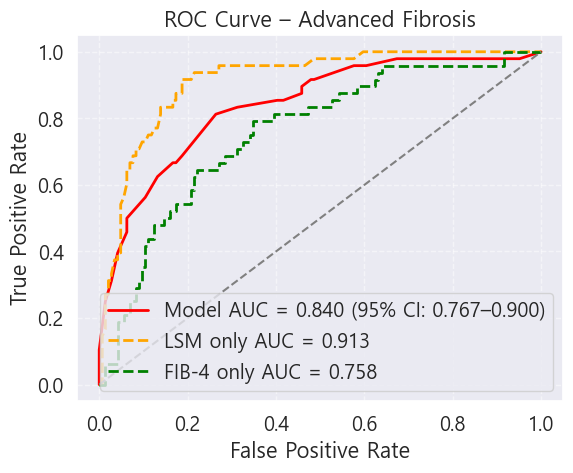

In [24]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# ──────────────── ROC & AUC: 모델 ────────────────
auc_model = roc_auc_score(y, y_pred)
fpr_model, tpr_model, _ = roc_curve(y, y_pred)

# ──────────────── ROC & AUC: LSM ────────────────
df_lsm = df[[dependent_variable, "LSM"]].dropna()
y_lsm = df_lsm[dependent_variable]
x_lsm = df_lsm["LSM"]
auc_lsm = roc_auc_score(y_lsm, x_lsm)
fpr_lsm, tpr_lsm, _ = roc_curve(y_lsm, x_lsm)

# ──────────────── ROC & AUC: FIB-4 ────────────────
df_fib = df[[dependent_variable, "FIB-4"]].dropna()
y_fib = df_fib[dependent_variable]
x_fib = df_fib["FIB-4"]
auc_fib = roc_auc_score(y_fib, x_fib)
fpr_fib, tpr_fib, _ = roc_curve(y_fib, x_fib)

# ──────────────── Bootstrap CI (Model) ────────────────
n_bootstraps = 1000
rng = np.random.RandomState(seed=42)
bootstrapped_aucs = []

for _ in range(n_bootstraps):
    indices = rng.choice(len(y), size=len(y), replace=True)
    if len(np.unique(y.iloc[indices])) < 2:
        continue
    score = roc_auc_score(y.iloc[indices], y_pred.iloc[indices])
    bootstrapped_aucs.append(score)

ci_lower = np.percentile(bootstrapped_aucs, 2.5)
ci_upper = np.percentile(bootstrapped_aucs, 97.5)

# ──────────────── Print AUC info ────────────────
print(
    f"✅ Multivariable Model AUC: {auc_model:.3f} (95% CI: {ci_lower:.3f} – {ci_upper:.3f})"
)
print(f"✅ LSM only AUC: {auc_lsm:.3f}")
print(f"✅ FIB-4 only AUC: {auc_fib:.3f}")

# ──────────────── Plot ROC Curve ────────────────
plt.figure(figsize=(6, 5))
plt.plot(
    fpr_model,
    tpr_model,
    label=f"Model AUC = {auc_model:.3f} (95% CI: {ci_lower:.3f}–{ci_upper:.3f})",
    lw=2,
    color="red",
)
plt.plot(
    fpr_lsm,
    tpr_lsm,
    linestyle="--",
    label=f"LSM only AUC = {auc_lsm:.3f}",
    lw=2,
    color="orange",
)
plt.plot(
    fpr_fib,
    tpr_fib,
    linestyle="--",
    label=f"FIB-4 only AUC = {auc_fib:.3f}",
    lw=2,
    color="green",
)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve – {dependent_variable}")
plt.legend(loc="lower right")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# coeff에 비례하여 risk score 계산

df["Advanced_Fibrosis_risk_score"] = (
    +3 * df["AST_above_median"]

    + 2 * df["당뇨병/당뇨병 전단계 유무2"]
    + 2 * df["Waist to Height_above_median"]
    - 3 * df["SMA (Volume)_above_median"]
    - 2 * df["ALT_above_median"]
)

✅ Scoring AUC: 0.832
✅ Multivariable Model AUC: 0.840
✅ LSM only AUC: 0.913


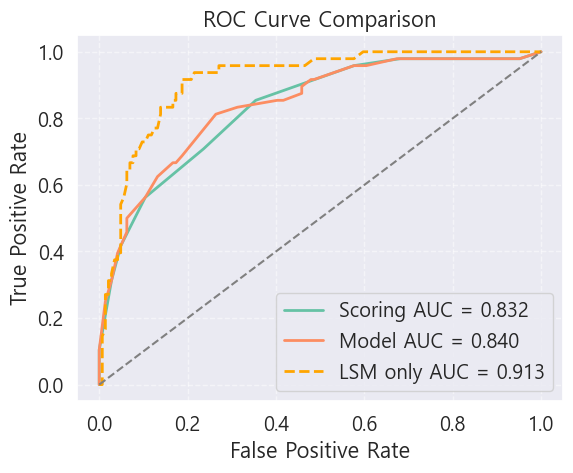

In [182]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# ▶ 1. Scoring 기반 예측값
score = df["Advanced_Fibrosis_risk_score"]
y_true = df["Advanced Fibrosis"]

# ▶ 2. Multivariable 모델 예측값 (← 반드시 이걸로)
y_pred = final_model.predict(X[final_vars])

# ▶ 3. LSM 예측값
df_lsm = df[[dependent_variable, "LSM"]].dropna()
y_lsm = df_lsm[dependent_variable]
x_lsm = df_lsm["LSM"]

# ▶ ROC 계산
fpr_score, tpr_score, _ = roc_curve(y_true, score)
auc_score = roc_auc_score(y_true, score)

fpr_model, tpr_model, _ = roc_curve(y, y_pred)
auc_model = roc_auc_score(y, y_pred)

fpr_lsm, tpr_lsm, _ = roc_curve(y_lsm, x_lsm)
auc_lsm = roc_auc_score(y_lsm, x_lsm)

# ▶ AUC 출력
print(f"✅ Scoring AUC: {auc_score:.3f}")
print(f"✅ Multivariable Model AUC: {auc_model:.3f}")
print(f"✅ LSM only AUC: {auc_lsm:.3f}")

# ▶ Plot
plt.figure(figsize=(6, 5))
plt.plot(fpr_score, tpr_score, label=f"Scoring AUC = {auc_score:.3f}", lw=2)
plt.plot(fpr_model, tpr_model, label=f"Model AUC = {auc_model:.3f}", lw=2)
plt.plot(
    fpr_lsm,
    tpr_lsm,
    linestyle="--",
    label=f"LSM only AUC = {auc_lsm:.3f}",
    lw=2,
    color="orange",
)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

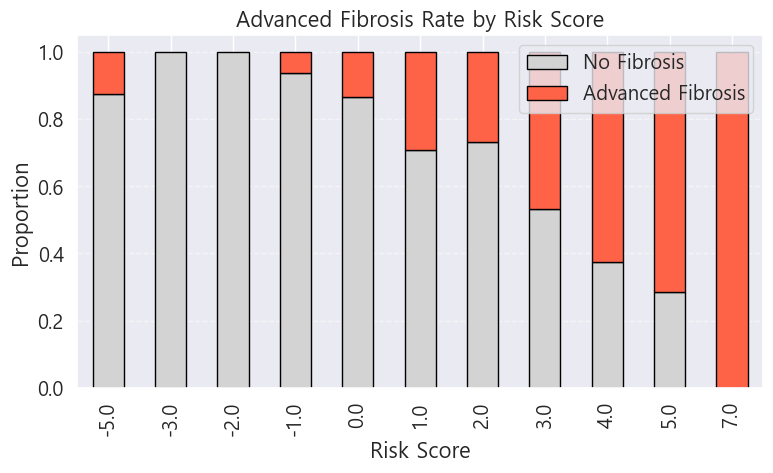

In [26]:
import matplotlib.pyplot as plt

score_dist = (
    df.groupby("Advanced_Fibrosis_risk_score")["Advanced Fibrosis"]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
    .rename(columns={0: "No Fibrosis", 1: "Advanced Fibrosis"})
    .sort_index()
)

score_dist.plot(
    kind="bar",
    stacked=True,
    figsize=(8, 5),
    color=["lightgray", "tomato"],
    edgecolor="black",
)

plt.xlabel("Risk Score")
plt.ylabel("Proportion")
plt.title("Advanced Fibrosis Rate by Risk Score")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

### Significant Fibrosis에 대해서도 동일하게

In [49]:
import pandas as pd
import statsmodels.api as sm

# Create binary label for fibrosis (e.g., advanced fibrosis defined as stage ≥ 3)
# df = matched_df.copy()
temp_df = df.copy()

dependent_variable = "Significant Fibrosis"


# Function to perform univariable logistic regression and return OR, CI, and p-value
def logistic_odds_ratio_analysis(df, covariates, outcome_col):
    results = []

    for var in covariates:
        try:
            sub_df = df[[outcome_col, var]].dropna()

            if sub_df[var].nunique() <= 1:
                print(f"⚠️ Skipping '{var}' — only one unique value.")
                continue

            sub_df = sm.add_constant(sub_df)
            model = sm.Logit(sub_df[outcome_col], sub_df[["const", var]]).fit(disp=0)

            odds_ratio = np.exp(model.params[var])
            conf = model.conf_int().loc[var]
            ci_lower, ci_upper = np.exp(conf[0]), np.exp(conf[1])

            pval = model.pvalues[var]

            results.append(
                {
                    "Variable": var,
                    "OR": odds_ratio,
                    "95% CI Lower": ci_lower,
                    "95% CI Upper": ci_upper,
                    "p-value": pval,
                }
            )
        except Exception as e:
            print(f"❌ Error with '{var}': {e}")
            continue

    return pd.DataFrame(results).sort_values(by="p-value")


# Run the analysis
odds_ratio_results = logistic_odds_ratio_analysis(
    temp_df, covariates, outcome_col=dependent_variable
)
# print(odds_ratio_results)

import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score, roc_curve

# Use a copy of the original DataFrame
df_model = df.copy()


# Filter the covariates from previous univariable results
prof_vars = [
    "Age",
    "Waist to Height",
    "BMI",
    "Sex",
    "AST",
    "ALT",
    "당뇨병/당뇨병 전단계 유무",
    "당뇨병/당뇨병 전단계 유무2",
    "PLT",
    "PT INR",
    "Alb",
    "VFI",
    "SFI",
    "TFI",
    "SMI",
    "VFA (Volume)",
    "SFA (Volume)",
    "SMA (Volume)",
    "Spleen (Volume)",
    "Liver (Volume)",
    # "VFA (Area)",
    # "SFA (Area)",
    # "SMA (Area)",
    # "VFA (Attenuation)",
    # "SFA (Attenuation)",
    # "SMA (Attenuation)",
    "Liver/Spleen Volume",
    "Liver/Spleen HU",
    # "Liver (HU)",
    # "Spleen (HU)",
    # "Liver (PDFF)",
]

prof_vars_above_median = [var + "_above_median" for var in prof_vars]

# Step 2: Replace specific ones (like 'DM_above_median' and 'Sex_above_median') with original names
replace_back = [
    "당뇨병/당뇨병 전단계 유무",
    "당뇨병/당뇨병 전단계 유무2",
    "Sex",
]
prof_vars_above_median = [
    (
        var
        if var.replace("_above_median", "") not in replace_back
        else var.replace("_above_median", "")
    )
    for var in prof_vars_above_median
]

significant_vars = list(
    set(odds_ratio_results[odds_ratio_results["p-value"] < 0.05]["Variable"])
    & set(prof_vars_above_median)
)
# Exclude LSM from modeling
significant_vars = [var for var in significant_vars if var != "LSM_above_median"]


# Drop rows with missing values for selected covariates and outcome
model_df = df_model[[dependent_variable] + significant_vars].dropna()

# Define X and y
X = model_df[significant_vars]
y = model_df[dependent_variable]

# Add constant for intercept
X = sm.add_constant(X)


# Perform backward stepwise logistic regression
def backward_stepwise(X, y, threshold_out=0.05):
    remaining_vars = X.columns.tolist()
    while len(remaining_vars) > 1:
        model = sm.Logit(y, X[remaining_vars]).fit(disp=0)
        pvals = model.pvalues.iloc[1:]  # exclude intercept
        max_pval = pvals.max()
        if max_pval > threshold_out:
            excluded_var = pvals.idxmax()
            remaining_vars.remove(excluded_var)
        else:
            break
    final_model = sm.Logit(y, X[remaining_vars]).fit(disp=0)
    return final_model, remaining_vars


# Run backward stepwise
final_model, final_vars = backward_stepwise(X, y)

# Predict probabilities and calculate AUC
y_pred = final_model.predict(X[final_vars])
auc = roc_auc_score(y, y_pred)

# Extract the summary table
summary_df = final_model.summary2().tables[1]

# Calculate Odds Ratios and 95% CI
summary_df["OR"] = summary_df["Coef."].apply(lambda x: round(np.exp(x), 3))
summary_df["CI Lower"] = (summary_df["Coef."] - 1.96 * summary_df["Std.Err."]).apply(
    lambda x: round(np.exp(x), 3)
)
summary_df["CI Upper"] = (summary_df["Coef."] + 1.96 * summary_df["Std.Err."]).apply(
    lambda x: round(np.exp(x), 3)
)
summary_df["AUC"] = round(auc, 5)

# Optional: Rearrange columns
summary_df = summary_df[
    ["Coef.", "Std.Err.", "P>|z|", "OR", "CI Lower", "CI Upper", "AUC"]
]
print(f"📊 Multivariable Logistic Regression for {dependent_variable}")

summary_df

📊 Multivariable Logistic Regression for Significant Fibrosis


,Coef.,Std.Err.,P>|z|,OR,CI Lower,CI Upper,AUC
const,-1.646243,0.470516,0.000467,0.193,0.077,0.485,0.82664
SMA (Volume)_above_median,-1.254130,0.396715,0.001571,0.285,0.131,0.621,0.82664
PLT_above_median,-0.752028,0.382331,0.049188,0.471,0.223,0.997,0.82664
Waist to Height_above_median,0.930882,0.379787,0.014244,2.537,1.205,5.340,0.82664
Age_above_median,0.968053,0.375283,0.009894,2.633,1.262,5.494,0.82664
당뇨병/당뇨병 전단계 유무2,1.221471,0.402176,0.002388,3.392,1.542,7.461,0.82664
AST_above_median,1.158139,0.370922,0.001794,3.184,1.539,6.587,0.82664


✅ Multivariable Model AUC: 0.827 (95% CI: 0.758 – 0.884)
✅ LSM only AUC: 0.886
✅ FIB-4 only AUC: 0.735


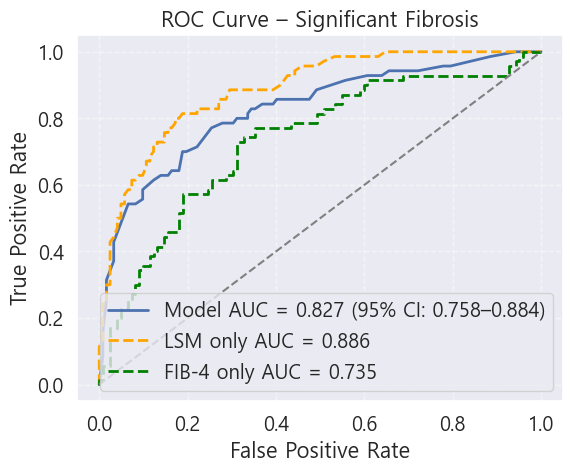

In [50]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# ──────────────── ROC & AUC: 모델 ────────────────
auc_model = roc_auc_score(y, y_pred)
fpr_model, tpr_model, _ = roc_curve(y, y_pred)

# ──────────────── ROC & AUC: LSM ────────────────
df_lsm = df[[dependent_variable, "LSM"]].dropna()
y_lsm = df_lsm[dependent_variable]
x_lsm = df_lsm["LSM"]
auc_lsm = roc_auc_score(y_lsm, x_lsm)
fpr_lsm, tpr_lsm, _ = roc_curve(y_lsm, x_lsm)

# ──────────────── ROC & AUC: FIB-4 ────────────────
df_fib = df[[dependent_variable, "FIB-4"]].dropna()
y_fib = df_fib[dependent_variable]
x_fib = df_fib["FIB-4"]
auc_fib = roc_auc_score(y_fib, x_fib)
fpr_fib, tpr_fib, _ = roc_curve(y_fib, x_fib)

# ──────────────── Bootstrap CI (Model) ────────────────
n_bootstraps = 1000
rng = np.random.RandomState(seed=42)
bootstrapped_aucs = []

for _ in range(n_bootstraps):
    indices = rng.choice(len(y), size=len(y), replace=True)
    if len(np.unique(y.iloc[indices])) < 2:
        continue
    score = roc_auc_score(y.iloc[indices], y_pred.iloc[indices])
    bootstrapped_aucs.append(score)

ci_lower = np.percentile(bootstrapped_aucs, 2.5)
ci_upper = np.percentile(bootstrapped_aucs, 97.5)

# ──────────────── Print AUC info ────────────────
print(
    f"✅ Multivariable Model AUC: {auc_model:.3f} (95% CI: {ci_lower:.3f} – {ci_upper:.3f})"
)
print(f"✅ LSM only AUC: {auc_lsm:.3f}")
print(f"✅ FIB-4 only AUC: {auc_fib:.3f}")

# ──────────────── Plot ROC Curve ────────────────
plt.figure(figsize=(6, 5))
plt.plot(
    fpr_model,
    tpr_model,
    label=f"Model AUC = {auc_model:.3f} (95% CI: {ci_lower:.3f}–{ci_upper:.3f})",
    lw=2,
)
plt.plot(
    fpr_lsm,
    tpr_lsm,
    linestyle="--",
    label=f"LSM only AUC = {auc_lsm:.3f}",
    lw=2,
    color="orange",
)
plt.plot(
    fpr_fib,
    tpr_fib,
    linestyle="--",
    label=f"FIB-4 only AUC = {auc_fib:.3f}",
    lw=2,
    color="green",
)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve – {dependent_variable}")
plt.legend(loc="lower right")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

## Moderate-to-Severe Steatosis

In [74]:
import pandas as pd
import statsmodels.api as sm

# Create binary label for fibrosis (e.g., advanced fibrosis defined as stage ≥ 3)
# df = matched_df.copy()
temp_df = df.copy()

dependent_variable = "Moderate-to-Severe Steatosis"


# Function to perform univariable logistic regression and return OR, CI, and p-value
def logistic_odds_ratio_analysis(df, covariates, outcome_col):
    results = []

    for var in covariates:
        try:
            sub_df = df[[outcome_col, var]].dropna()

            if sub_df[var].nunique() <= 1:
                print(f"⚠️ Skipping '{var}' — only one unique value.")
                continue

            sub_df = sm.add_constant(sub_df)
            model = sm.Logit(sub_df[outcome_col], sub_df[["const", var]]).fit(disp=0)

            odds_ratio = np.exp(model.params[var])
            conf = model.conf_int().loc[var]
            ci_lower, ci_upper = np.exp(conf[0]), np.exp(conf[1])

            pval = model.pvalues[var]

            results.append(
                {
                    "Variable": var,
                    "OR": odds_ratio,
                    "95% CI Lower": ci_lower,
                    "95% CI Upper": ci_upper,
                    "p-value": pval,
                }
            )
        except Exception as e:
            print(f"❌ Error with '{var}': {e}")
            continue

    return pd.DataFrame(results).sort_values(by="p-value")


# Run the analysis
odds_ratio_results = logistic_odds_ratio_analysis(
    temp_df, covariates, outcome_col=dependent_variable
)
# print(odds_ratio_results)

import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score, roc_curve

# Use a copy of the original DataFrame
df_model = df.copy()

# Filter the covariates from previous univariable results
prof_vars = [
    "Age",
    "Waist to Height",
    "BMI",
    "Sex",
    "AST",
    "ALT",
    "당뇨병/당뇨병 전단계 유무",
    "당뇨병/당뇨병 전단계 유무2",
    "PLT",
    "PT INR",
    "Alb",
    "VFI",
    "SFI",
    "TFI",
    "SMI",
    "VFA (Volume)",
    "SFA (Volume)",
    "SMA (Volume)",
    "Spleen (Volume)",
    "Liver (Volume)",
    "VFA (Area)",
    "SFA (Area)",
    "SMA (Area)",
    "VFA (Attenuation)",
    "SFA (Attenuation)",
    "SMA (Attenuation)",
    "Liver/Spleen Volume",
    "Liver/Spleen HU",
    # "Liver (HU)",
    # "Spleen (HU)",
    # "Liver (PDFF)",
]

prof_vars_above_median = [var + "_above_median" for var in prof_vars]

# Step 2: Replace specific ones (like 'DM_above_median' and 'Sex_above_median') with original names
replace_back = [
    "당뇨병/당뇨병 전단계 유무",
    "당뇨병/당뇨병 전단계 유무2",
    "Sex",
]
prof_vars_above_median = [
    (
        var
        if var.replace("_above_median", "") not in replace_back
        else var.replace("_above_median", "")
    )
    for var in prof_vars_above_median
]

significant_vars = list(
    set(odds_ratio_results[odds_ratio_results["p-value"] < 0.05]["Variable"])
    & set(prof_vars_above_median)
)
# Exclude LSM from modeling
significant_vars = [var for var in significant_vars if var != "LSM_above_median"]


# Drop rows with missing values for selected covariates and outcome
model_df = df_model[[dependent_variable] + significant_vars].dropna()

# Define X and y
X = model_df[significant_vars]
y = model_df[dependent_variable]

# Add constant for intercept
X = sm.add_constant(X)


# Perform backward stepwise logistic regression
def backward_stepwise(X, y, threshold_out=0.05):
    remaining_vars = X.columns.tolist()
    while len(remaining_vars) > 1:
        model = sm.Logit(y, X[remaining_vars]).fit(disp=0)
        pvals = model.pvalues.iloc[1:]  # exclude intercept
        max_pval = pvals.max()
        if max_pval > threshold_out:
            excluded_var = pvals.idxmax()
            remaining_vars.remove(excluded_var)
        else:
            break
    final_model = sm.Logit(y, X[remaining_vars]).fit(disp=0)
    return final_model, remaining_vars


# Run backward stepwise
final_model, final_vars = backward_stepwise(X, y)

# Predict probabilities and calculate AUC
y_pred = final_model.predict(X[final_vars])
auc = roc_auc_score(y, y_pred)

# Extract the summary table
summary_df = final_model.summary2().tables[1]

# Calculate Odds Ratios and 95% CI
summary_df["OR"] = summary_df["Coef."].apply(lambda x: round(np.exp(x), 3))
summary_df["CI Lower"] = (summary_df["Coef."] - 1.96 * summary_df["Std.Err."]).apply(
    lambda x: round(np.exp(x), 3)
)
summary_df["CI Upper"] = (summary_df["Coef."] + 1.96 * summary_df["Std.Err."]).apply(
    lambda x: round(np.exp(x), 3)
)
summary_df["AUC"] = round(auc, 5)

# Optional: Rearrange columns
summary_df = summary_df[
    ["Coef.", "Std.Err.", "P>|z|", "OR", "CI Lower", "CI Upper", "AUC"]
]
print(f"📊 Multivariable Logistic Regression for {dependent_variable}")

summary_df

📊 Multivariable Logistic Regression for Moderate-to-Severe Steatosis


,Coef.,Std.Err.,P>|z|,OR,CI Lower,CI Upper,AUC
const,-1.110422,0.473509,0.019022,0.329,0.130,0.833,0.84666
Liver/Spleen HU_above_median,-1.830665,0.398526,0.000004,0.160,0.073,0.350,0.84666
PT INR_above_median,-0.910942,0.390738,0.019736,0.402,0.187,0.865,0.84666
TFI_above_median,1.101557,0.412948,0.007641,3.009,1.339,6.759,0.84666
Sex,1.162950,0.420384,0.005668,3.199,1.404,7.293,0.84666
Liver (Volume)_above_median,1.043141,0.396320,0.008487,2.838,1.305,6.171,0.84666


✅ Multivariable Model AUC: 0.847 (95% CI: 0.786 – 0.901)
✅ CAP only AUC: 0.728


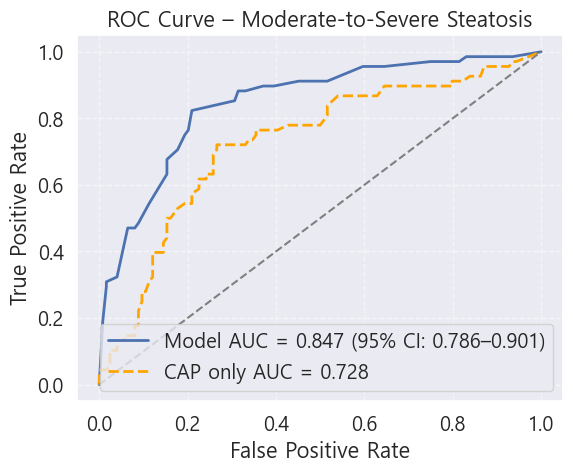

In [68]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# 기존 모델 ROC
auc_model = roc_auc_score(y, y_pred)
fpr_model, tpr_model, _ = roc_curve(y, y_pred)

# CAP 단일 변수 ROC
df_cap = df[[dependent_variable, "CAP"]].dropna()
y_cap = df_cap[dependent_variable]
x_cap = df_cap["CAP"]
auc_cap = roc_auc_score(y_cap, x_cap)
fpr_cap, tpr_cap, _ = roc_curve(y_cap, x_cap)

# 모델 bootstrap AUC CI
n_bootstraps = 1000
rng = np.random.RandomState(seed=42)
bootstrapped_aucs = []

for _ in range(n_bootstraps):
    indices = rng.choice(len(y), size=len(y), replace=True)
    if len(np.unique(y.iloc[indices])) < 2:
        continue
    score = roc_auc_score(y.iloc[indices], y_pred.iloc[indices])
    bootstrapped_aucs.append(score)

ci_lower = np.percentile(bootstrapped_aucs, 2.5)
ci_upper = np.percentile(bootstrapped_aucs, 97.5)

# ▶ AUC + CI 출력
print(
    f"✅ Multivariable Model AUC: {auc_model:.3f} (95% CI: {ci_lower:.3f} – {ci_upper:.3f})"
)
print(f"✅ CAP only AUC: {auc_cap:.3f}")

# ▶ Plot
plt.figure(figsize=(6, 5))
plt.plot(
    fpr_model,
    tpr_model,
    label=f"Model AUC = {auc_model:.3f} (95% CI: {ci_lower:.3f}–{ci_upper:.3f})",
    lw=2,
)
plt.plot(
    fpr_cap,
    tpr_cap,
    linestyle="--",
    label=f"CAP only AUC = {auc_cap:.3f}",
    lw=2,
    color="orange",
)

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve – {dependent_variable}")
plt.legend(loc="lower right")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

In [75]:
df["Moderate-to-Severe_Steatosis_risk_score"] = (
    +2 * df["Sex"]
    + 2 * df["TFI_above_median"]
    + 2 * df["Liver (Volume)_above_median"]
    - 2 * df["PT INR_above_median"]
    - 3 * df["Liver/Spleen HU_above_median"]
)

In [ ]:
df["Moderate-to-Severe_Steatosis_risk_score"].unique()

array([-5, -3, -1,  4,  2,  6, -2,  0,  1,  3])

✅ Scoring AUC: 0.846
✅ Multivariable Model AUC: 0.847
✅ CAP only AUC: 0.728


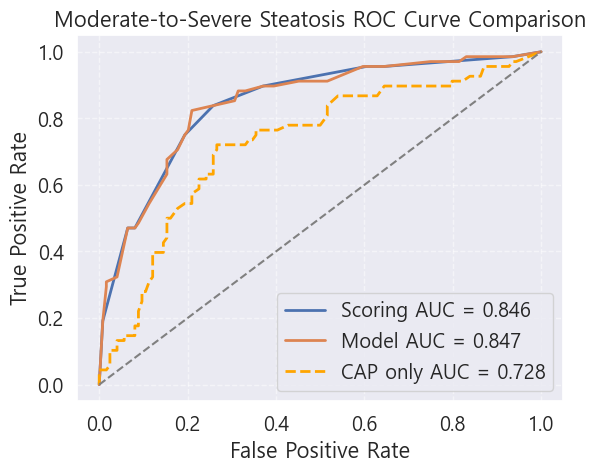

In [76]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# ▶ 1. Scoring 기반 예측값
score = df["Moderate-to-Severe_Steatosis_risk_score"]
y_true = df["Moderate-to-Severe Steatosis"]

# ▶ 2. Multivariable 모델 예측값 (← 반드시 이걸로)
y_pred = final_model.predict(X[final_vars])

# ▶ 3. LSM 예측값
df_cap = df[[dependent_variable, "CAP"]].dropna()
y_cap = df_cap[dependent_variable]
x_cap = df_cap["CAP"]

# ▶ ROC 계산
fpr_score, tpr_score, _ = roc_curve(y_true, score)
auc_score = roc_auc_score(y_true, score)

fpr_model, tpr_model, _ = roc_curve(y, y_pred)
auc_model = roc_auc_score(y, y_pred)

fpr_cap, tpr_cap, _ = roc_curve(y_cap, x_cap)
auc_cap = roc_auc_score(y_cap, x_cap)

# ▶ AUC 출력
print(f"✅ Scoring AUC: {auc_score:.3f}")
print(f"✅ Multivariable Model AUC: {auc_model:.3f}")
print(f"✅ CAP only AUC: {auc_cap:.3f}")

# ▶ Plot
plt.figure(figsize=(6, 5))
plt.plot(fpr_score, tpr_score, label=f"Scoring AUC = {auc_score:.3f}", lw=2)
plt.plot(fpr_model, tpr_model, label=f"Model AUC = {auc_model:.3f}", lw=2)
plt.plot(
    fpr_cap,
    tpr_cap,
    linestyle="--",
    label=f"CAP only AUC = {auc_cap:.3f}",
    lw=2,
    color="orange",
)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"{dependent_variable} ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

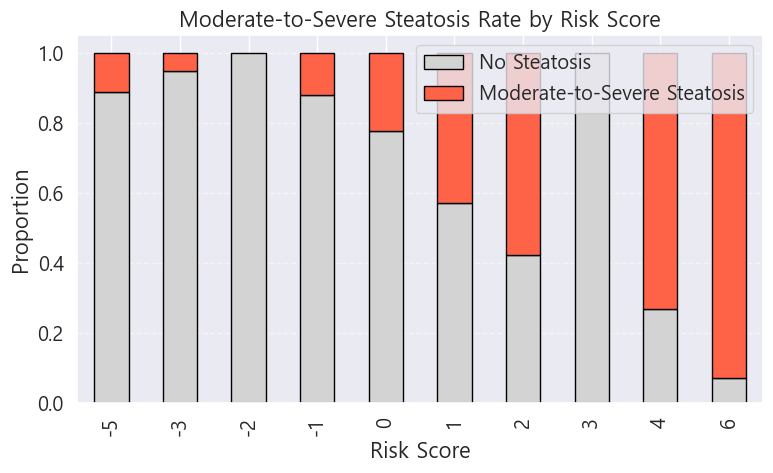

In [ ]:
import matplotlib.pyplot as plt

# 점수별 비율 집계
score_dist = (
    df.groupby("Moderate-to-Severe_Steatosis_risk_score")[
        "Moderate-to-Severe Steatosis"
    ]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
)
score_dist.columns = ["No Steatosis", "Moderate-to-Severe Steatosis"]
score_dist = score_dist.sort_index()

# 막대그래프
score_dist.plot(
    kind="bar",
    stacked=True,
    figsize=(8, 5),
    color=["lightgray", "tomato"],
    edgecolor="black",
)

plt.xlabel("Risk Score")
plt.ylabel("Proportion")
plt.title("Moderate-to-Severe Steatosis Rate by Risk Score")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Create binary label for fibrosis (e.g., advanced fibrosis defined as stage ≥ 3)
# df = matched_df.copy()
temp_df = df.copy()

dependent_variable = "Mild-to-Severe Steatosis"


# Function to perform univariable logistic regression and return OR, CI, and p-value
def logistic_odds_ratio_analysis(df, covariates, outcome_col):
    results = []

    for var in covariates:
        try:
            sub_df = df[[outcome_col, var]].dropna()

            if sub_df[var].nunique() <= 1:
                print(f"⚠️ Skipping '{var}' — only one unique value.")
                continue

            sub_df = sm.add_constant(sub_df)
            model = sm.Logit(sub_df[outcome_col], sub_df[["const", var]]).fit(disp=0)

            odds_ratio = np.exp(model.params[var])
            conf = model.conf_int().loc[var]
            ci_lower, ci_upper = np.exp(conf[0]), np.exp(conf[1])

            pval = model.pvalues[var]

            results.append(
                {
                    "Variable": var,
                    "OR": odds_ratio,
                    "95% CI Lower": ci_lower,
                    "95% CI Upper": ci_upper,
                    "p-value": pval,
                }
            )
        except Exception as e:
            print(f"❌ Error with '{var}': {e}")
            continue

    return pd.DataFrame(results).sort_values(by="p-value")


# Run the analysis
odds_ratio_results = logistic_odds_ratio_analysis(
    temp_df, covariates, outcome_col=dependent_variable
)
# print(odds_ratio_results)

import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score, roc_curve

# Use a copy of the original DataFrame
df_model = df.copy()

# Filter the covariates from previous univariable results
prof_vars = [
    "Age",
    "Waist to Height",
    "BMI",
    "Sex",
    "AST",
    "ALT",
    "당뇨병/당뇨병 전단계 유무",
    "당뇨병/당뇨병 전단계 유무2",
    "PLT",
    "PT INR",
    "Alb",
    "VFI",
    "SFI",
    "TFI",
    "SMI",
    "VFA (Volume)",
    "SFA (Volume)",
    "SMA (Volume)",
    "Spleen (Volume)",
    "Liver (Volume)",
    "VFA (Area)",
    "SFA (Area)",
    "SMA (Area)",
    "VFA (Attenuation)",
    "SFA (Attenuation)",
    "SMA (Attenuation)",
    "Liver/Spleen Volume",
    "Liver/Spleen HU",
    "Liver (HU)",
    "Spleen (HU)",
    "Liver (PDFF)",
]

prof_vars_above_median = [var + "_above_median" for var in prof_vars]

# Step 2: Replace specific ones (like 'DM_above_median' and 'Sex_above_median') with original names
replace_back = [
    "당뇨병/당뇨병 전단계 유무",
    "당뇨병/당뇨병 전단계 유무2",
    "Sex",
]
prof_vars_above_median = [
    (
        var
        if var.replace("_above_median", "") not in replace_back
        else var.replace("_above_median", "")
    )
    for var in prof_vars_above_median
]

significant_vars = list(
    set(odds_ratio_results[odds_ratio_results["p-value"] < 0.05]["Variable"])
    & set(prof_vars_above_median)
)
# Exclude LSM from modeling
significant_vars = [var for var in significant_vars if var != "LSM_above_median"]


# Drop rows with missing values for selected covariates and outcome
model_df = df_model[[dependent_variable] + significant_vars].dropna()

# Define X and y
X = model_df[significant_vars]
y = model_df[dependent_variable]

# Add constant for intercept
X = sm.add_constant(X)


# Perform backward stepwise logistic regression
def backward_stepwise(X, y, threshold_out=0.05):
    remaining_vars = X.columns.tolist()
    while len(remaining_vars) > 1:
        model = sm.Logit(y, X[remaining_vars]).fit(disp=0)
        pvals = model.pvalues.iloc[1:]  # exclude intercept
        max_pval = pvals.max()
        if max_pval > threshold_out:
            excluded_var = pvals.idxmax()
            remaining_vars.remove(excluded_var)
        else:
            break
    final_model = sm.Logit(y, X[remaining_vars]).fit(disp=0)
    return final_model, remaining_vars


# Run backward stepwise
final_model, final_vars = backward_stepwise(X, y)

# Predict probabilities and calculate AUC
y_pred = final_model.predict(X[final_vars])
auc = roc_auc_score(y, y_pred)

# Extract the summary table
summary_df = final_model.summary2().tables[1]

# Calculate Odds Ratios and 95% CI
summary_df["OR"] = summary_df["Coef."].apply(lambda x: round(np.exp(x), 3))
summary_df["CI Lower"] = (summary_df["Coef."] - 1.96 * summary_df["Std.Err."]).apply(
    lambda x: round(np.exp(x), 3)
)
summary_df["CI Upper"] = (summary_df["Coef."] + 1.96 * summary_df["Std.Err."]).apply(
    lambda x: round(np.exp(x), 3)
)
summary_df["AUC"] = round(auc, 5)

# Optional: Rearrange columns
summary_df = summary_df[
    ["Coef.", "Std.Err.", "P>|z|", "OR", "CI Lower", "CI Upper", "AUC"]
]
print(f"📊 Multivariable Logistic Regression for {dependent_variable}")

summary_df

📊 Multivariable Logistic Regression for Mild-to-Severe Steatosis


c:\Users\nahyun\DeepCatch\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\nahyun\AppData\Local\Temp\ipykernel_32568\1701159470.py:28: RuntimeWarning: overflow encountered in exp
  ci_lower, ci_upper = np.exp(conf[0]), np.exp(conf[1])


,Coef.,Std.Err.,P>|z|,OR,CI Lower,CI Upper,AUC
const,4.171655,0.846635,8.335728e-07,64.823,12.333,340.719,0.85979
Waist to Height_above_median,1.817375,0.608118,2.803280e-03,6.156,1.869,20.273,0.85979
Liver/Spleen HU_above_median,-2.498691,0.774790,1.259756e-03,0.082,0.018,0.375,0.85979
PT INR_above_median,-1.594825,0.571098,5.229292e-03,0.203,0.066,0.622,0.85979


✅ Multivariable Model AUC: 0.860 (95% CI: 0.797 – 0.920)
✅ CAP only AUC: 0.729


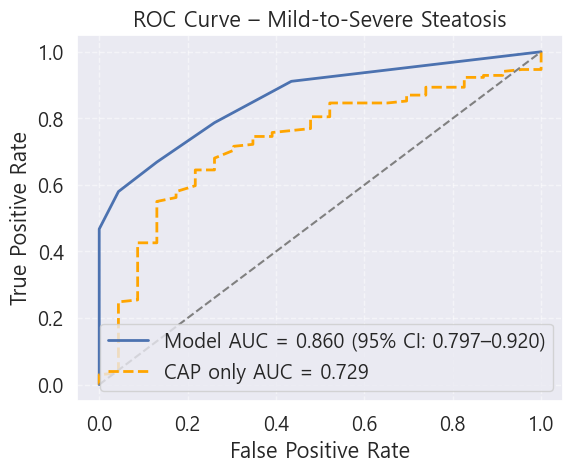

In [72]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# 기존 모델 ROC
auc_model = roc_auc_score(y, y_pred)
fpr_model, tpr_model, _ = roc_curve(y, y_pred)

# CAP 단일 변수 ROC
df_cap = df[[dependent_variable, "CAP"]].dropna()
y_cap = df_cap[dependent_variable]
x_cap = df_cap["CAP"]
auc_cap = roc_auc_score(y_cap, x_cap)
fpr_cap, tpr_cap, _ = roc_curve(y_cap, x_cap)

# 모델 bootstrap AUC CI
n_bootstraps = 1000
rng = np.random.RandomState(seed=42)
bootstrapped_aucs = []

for _ in range(n_bootstraps):
    indices = rng.choice(len(y), size=len(y), replace=True)
    if len(np.unique(y.iloc[indices])) < 2:
        continue
    score = roc_auc_score(y.iloc[indices], y_pred.iloc[indices])
    bootstrapped_aucs.append(score)

ci_lower = np.percentile(bootstrapped_aucs, 2.5)
ci_upper = np.percentile(bootstrapped_aucs, 97.5)

# ▶ AUC + CI 출력
print(
    f"✅ Multivariable Model AUC: {auc_model:.3f} (95% CI: {ci_lower:.3f} – {ci_upper:.3f})"
)
print(f"✅ CAP only AUC: {auc_cap:.3f}")

# ▶ Plot
plt.figure(figsize=(6, 5))
plt.plot(
    fpr_model,
    tpr_model,
    label=f"Model AUC = {auc_model:.3f} (95% CI: {ci_lower:.3f}–{ci_upper:.3f})",
    lw=2,
)
plt.plot(
    fpr_cap,
    tpr_cap,
    linestyle="--",
    label=f"CAP only AUC = {auc_cap:.3f}",
    lw=2,
    color="orange",
)

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve – {dependent_variable}")
plt.legend(loc="lower right")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()